<a href="https://colab.research.google.com/github/shila121/projects/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Framing the problem statement
Here,we will try to understand the problem statement and analyse how business is planning to use this.

# 2. Data Analysis
we will try to understand the data and try to draw som relationships hidden in the data.The different steps as below:
1.   Hypothesis testing
2.   EDA(univariate/Bivariate)
3.   Missing Data
4.   Numerical Data
5.   Outliers
6.   Categorical Data









# Step 1.Hypothesis Testing


*   Null Hypothesis :There is no relationship between predictor and target .
*   Alternate Hypothesis : There is significant relationship between target and predictor.




In [10]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# import dataset
data = pd.read_csv('data.csv')


# visualize the data
print('data visualization')
# print(train.head())
print(data.columns,len(data.columns),data.shape)
print('-'*60)
# drop 'Unnamed: 32' column
data.drop('Unnamed: 32',inplace = True,axis = 1)

# get the categorical columns from data
catCols = data.select_dtypes('object').columns
print('categorical columns:',catCols,len(catCols))
print('-'*60)

# get the numerical columns
numCols = data.select_dtypes('number').columns
print('numeric columns:',numCols,len(numCols))
print('-'*60)

# change the diagnosis to numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])

print(data['diagnosis'].unique())

data visualization
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object') 33 (569, 33)
------------------------------------------------------------
categorical columns: Index(['diagnosis'], dtype='object') 1
------------------------------------------------------------
numeric columns: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'co

In [11]:
# we will carry out z-test on the numerical columns to know their impact

from statsmodels.stats import weightstats as stests

significant_numCols,in_significant_numCols = [],[]
for i in numCols:
  p_val=stests.ztest(data[i],data.diagnosis)
  p_val = p_val[1]
  print('column:',i,'p_val:',p_val)
  if p_val < 0.05:
    status = 'Reject Null Hypothesis,Significant Predictor'
    print('status:',status)
    significant_numCols.append(i)
    print('-'*60)
  else:
    status='Accept Null Hypothesis,Insignificant Predictor'
    print('status:',status)
    in_significant_numCols.append(i)
    print('-'*60)
print('significant numeric variables:',significant_numCols,len(significant_numCols))
print('in-significant numeric variables:',in_significant_numCols,len(in_significant_numCols))

column: id p_val: 6.8363892291846145e-09
status: Reject Null Hypothesis,Significant Predictor
------------------------------------------------------------
column: radius_mean p_val: 0.0
status: Reject Null Hypothesis,Significant Predictor
------------------------------------------------------------
column: texture_mean p_val: 0.0
status: Reject Null Hypothesis,Significant Predictor
------------------------------------------------------------
column: perimeter_mean p_val: 0.0
status: Reject Null Hypothesis,Significant Predictor
------------------------------------------------------------
column: area_mean p_val: 0.0
status: Reject Null Hypothesis,Significant Predictor
------------------------------------------------------------
column: smoothness_mean p_val: 3.4878254156658057e-42
status: Reject Null Hypothesis,Significant Predictor
------------------------------------------------------------
column: compactness_mean p_val: 1.8324352254517196e-39
status: Reject Null Hypothesis,Significa

In [12]:
# we will carry chi2_square to know the effect of categorical columns
significant_catCols,in_significant_catCols = [],[]

from scipy.stats import chi2_contingency

for i in catCols:
  if i != 'diagnosis':
    stat,p_val,dof,ex = chi2_contingency(pd.crosstab(data[i],data.loan_status))
    print('column:',i,'p_val:',p_val)
    if p_val < 0.05:
      status = 'Reject Null Hypothesis,Significant Predictor'
      print('status:',status)
      significant_catCols.append(i)
      print('-'*60)
    else:
      status='Accept Null Hypothesis,Insignificant Predictor'
      print('status:',status)
      in_significant_catCols.append(i)
      print('-'*60)
print('significant categorical variables:',significant_catCols,len(significant_catCols))
print('in-significant categorical variables:',in_significant_catCols,len(in_significant_catCols))

significant categorical variables: [] 0
in-significant categorical variables: [] 0


# Step 2:EDA(Univariate/Bi-variate)

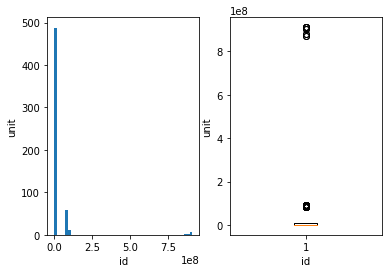

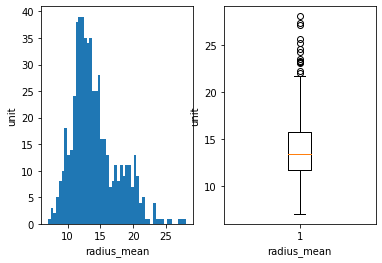

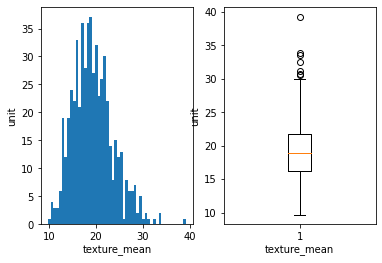

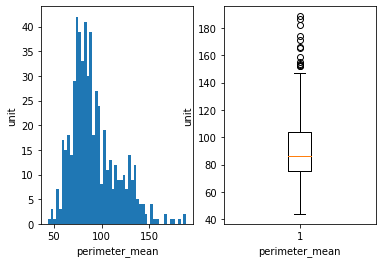

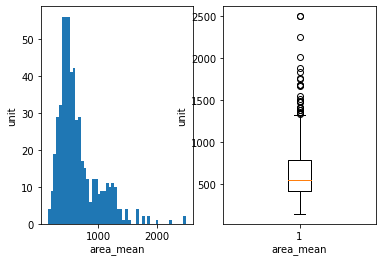

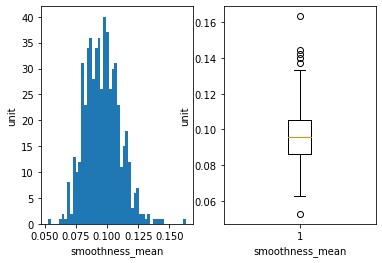

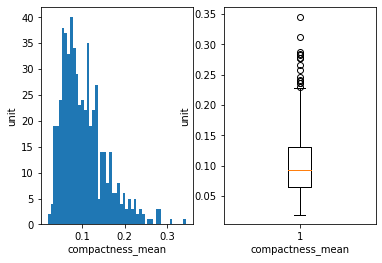

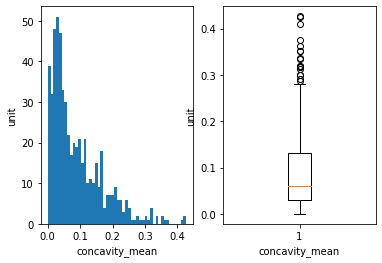

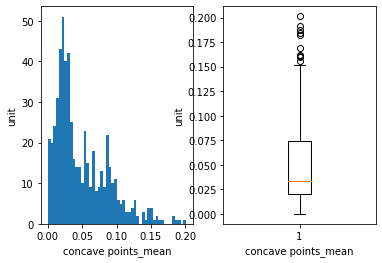

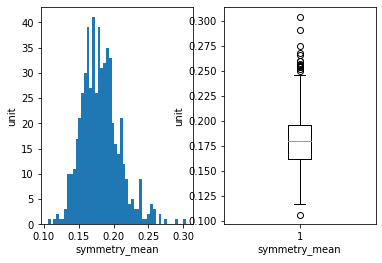

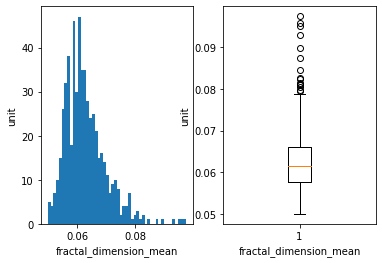

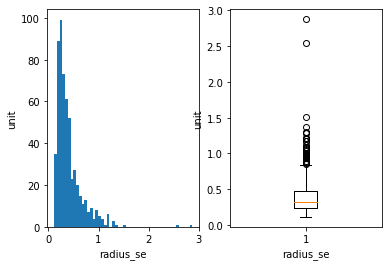

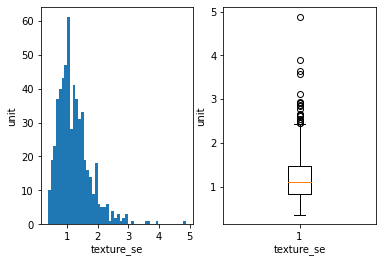

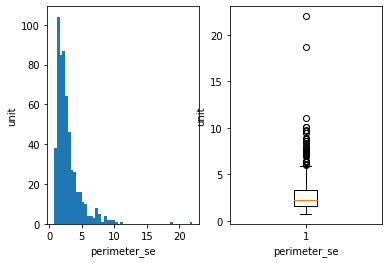

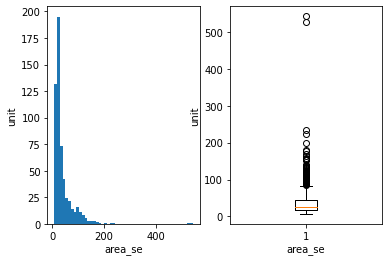

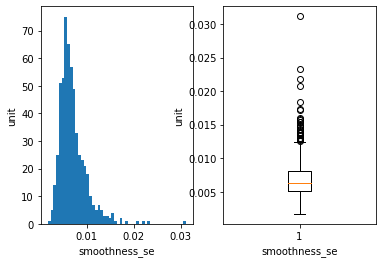

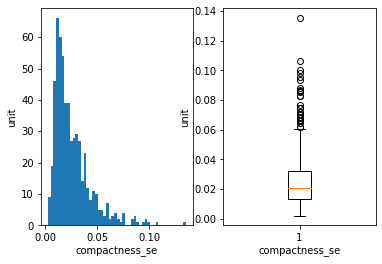

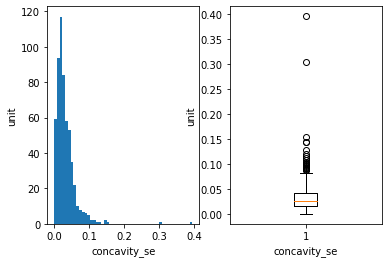

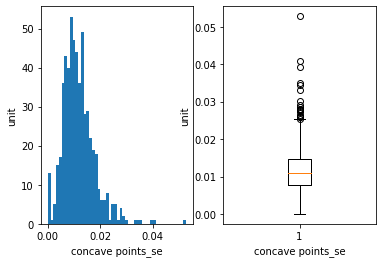

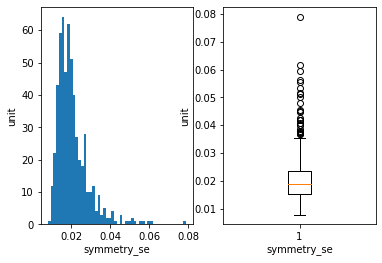

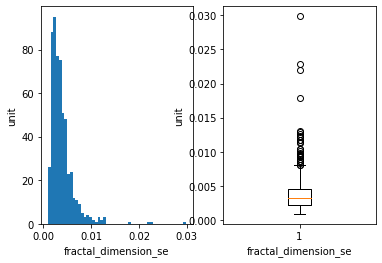

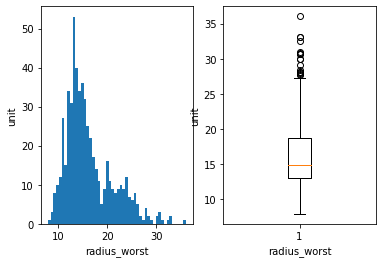

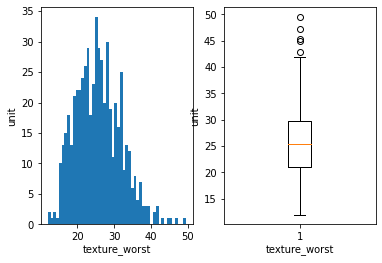

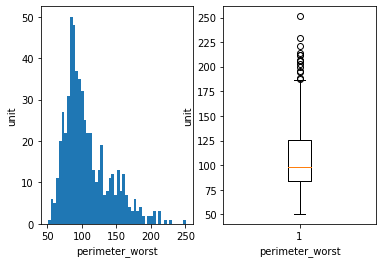

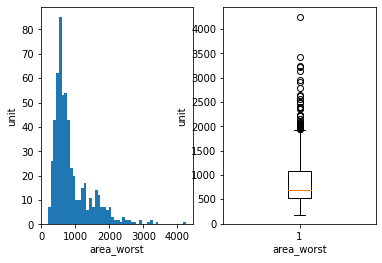

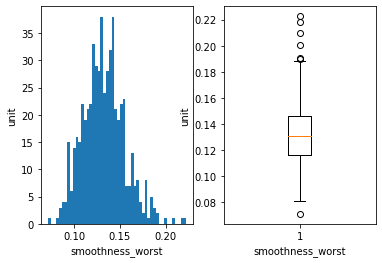

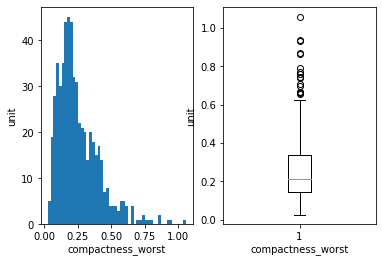

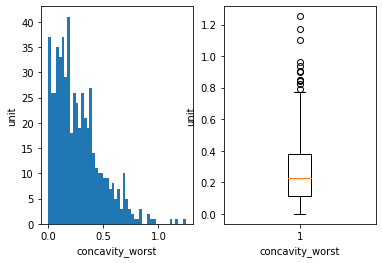

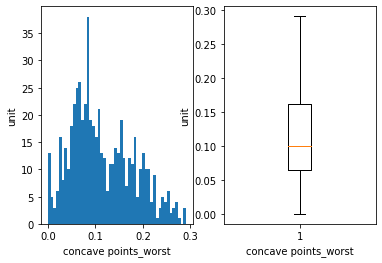

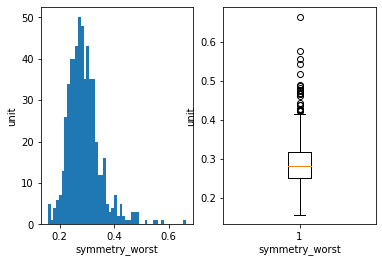

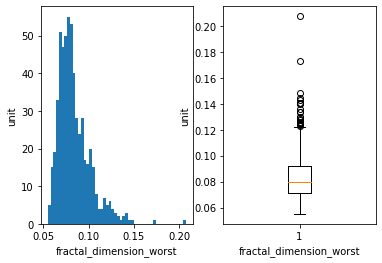

In [13]:
# Univariate analysis of numerical columns by histogram and boxplot

for i in numCols:
  try:
    plt.subplot(1,2,1)

    plt.hist(data[i],bins =50)
    plt.xlabel(i)
    plt.ylabel('unit')

    plt.subplot(1,2,2)
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel('unit')
    plt.show()
  except:
    pass

In [14]:
# univariate analysis of categorical columns with value_counts()

for i in catCols:
  print('column:',i)
  print(data[i].value_counts())
  print('-'*60)

column: diagnosis
0    357
1    212
Name: diagnosis, dtype: int64
------------------------------------------------------------


                               id  ...  fractal_dimension_worst
id                       1.000000  ...                -0.029866
diagnosis                0.039769  ...                 0.323872
radius_mean              0.074626  ...                 0.007066
texture_mean             0.099770  ...                 0.119205
perimeter_mean           0.073159  ...                 0.051019
area_mean                0.096893  ...                 0.003738
smoothness_mean         -0.012968  ...                 0.499316
compactness_mean         0.000096  ...                 0.687382
concavity_mean           0.050080  ...                 0.514930
concave points_mean      0.044158  ...                 0.368661
symmetry_mean           -0.022114  ...                 0.438413
fractal_dimension_mean  -0.052511  ...                 0.767297
radius_se                0.143048  ...                 0.049559
texture_se              -0.007526  ...                -0.045655
perimeter_se             0.137331  ...  

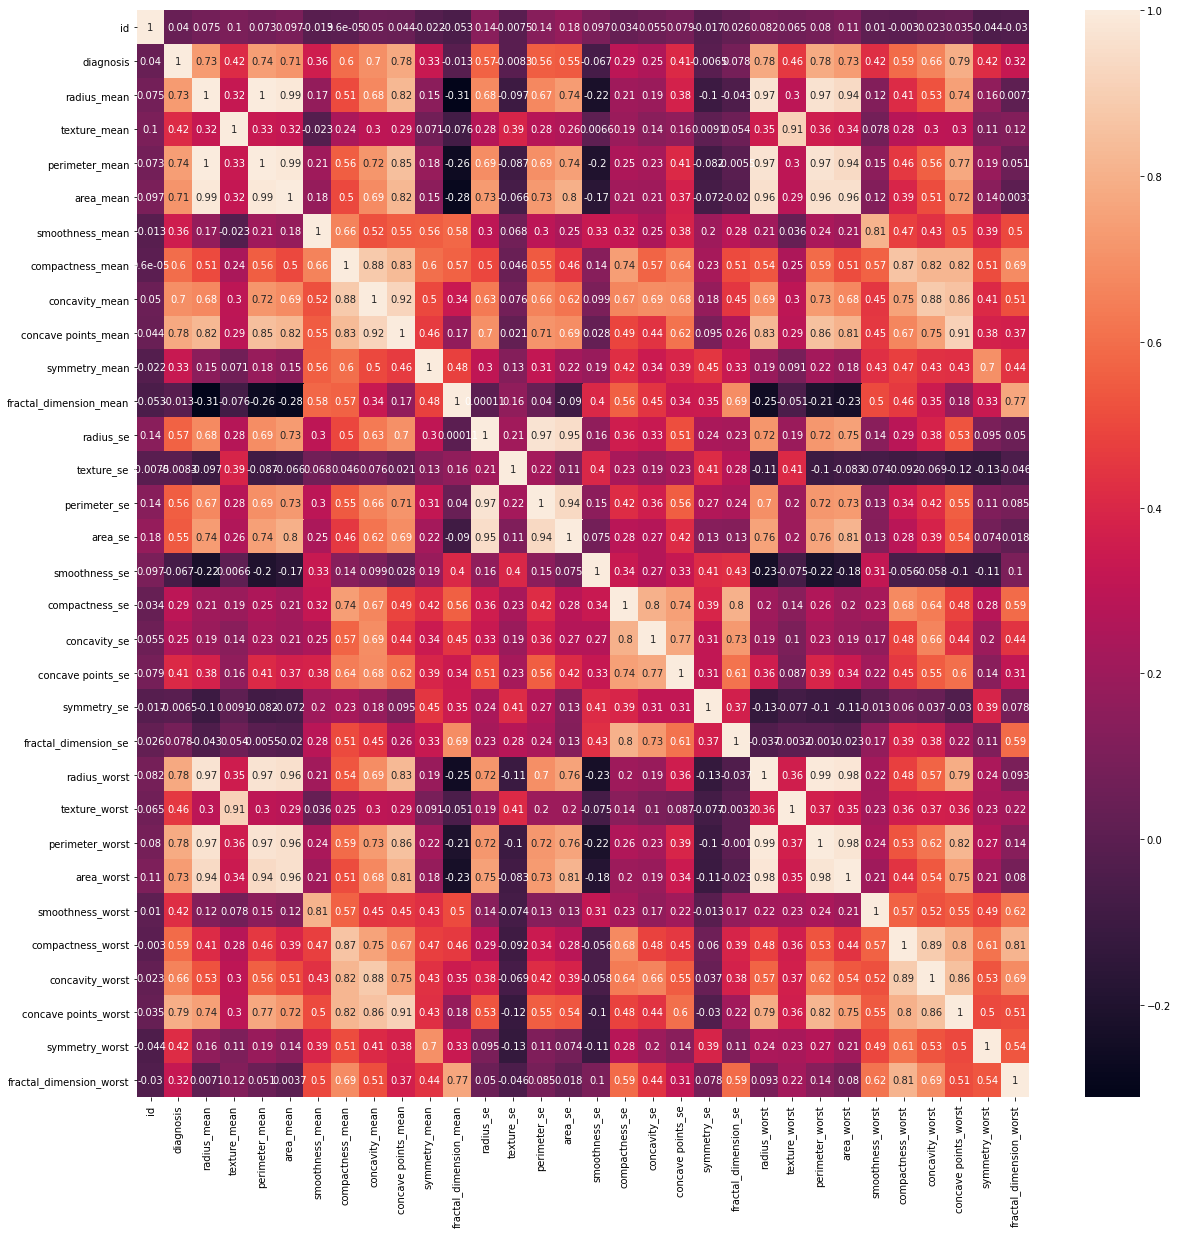

In [15]:
# Bi-variate analysis of numerical data by cor-relation matrix
import seaborn as sns
matrix = data.corr()
print(matrix)

fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(matrix,annot =True)

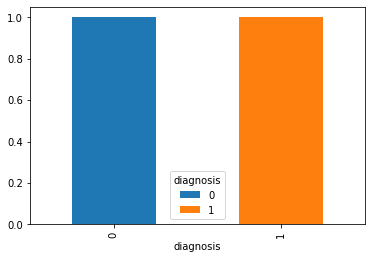

In [17]:
# Bi-variate analysis of categorical data

for i in catCols:
  try:
    category = pd.crosstab(data[i],data['diagnosis'])
    category.div(category.sum(1).astype(float),axis =0 ).plot(kind = 'bar',stacked = True)
    plt.show()
  except:
    pass


# Step 3:Missing data

In [18]:
# lets analyse if data contains any missing values

print(data.isnull().sum())

# get the variables having na values
# noted:no na values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Step 4:Numerical Data Analysis

In [19]:
print('numerical columns:',numCols,len(numCols))

# ->1. visualize the numerical columns
print(data[numCols].head())
print('-'*60)

# ->2.make a list of discrete numerical columns
discrete_numCols = [var for var in numCols if len(data[var].unique())<20]
print('discrete numerical columns:',discrete_numCols,len(discrete_numCols))
print('-'*60)

# ->3.visualize discrete numerical columns
print(data[discrete_numCols].head())
print('-'*60)

# ->4. make a list of continuous numerical columns
continuous_numCols =[ var for var in numCols if len(data[var].unique())>20]
print('continuous numerical columns:',continuous_numCols,len(continuous_numCols))
print('-'*60)

# ->5.visualize the continuous numerical columns
print(data[continuous_numCols].head())
print('-'*60)


numerical columns: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object') 31
         id  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0    842302        17.99  ...          0.4601                  0.11890
1    842517        20.57  ...          0.2750                  0.08902
2  84300903        19.69  ...          0.3613                  0.08758
3  84348301        11.42  ...          0.6638            

# Step 5:Outliers analysis

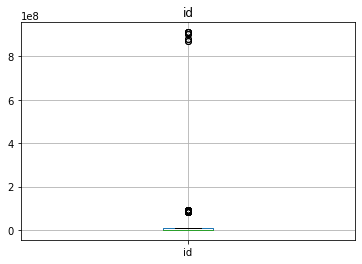

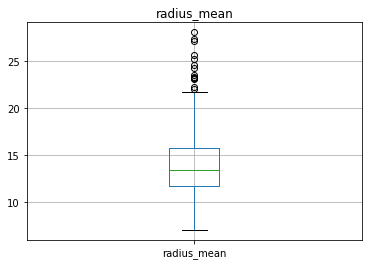

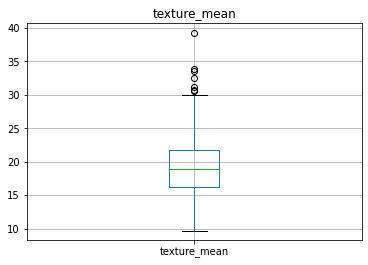

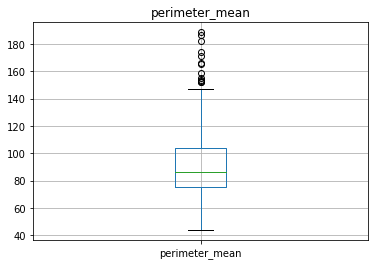

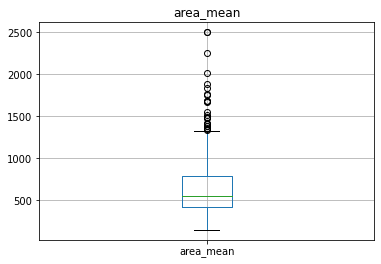

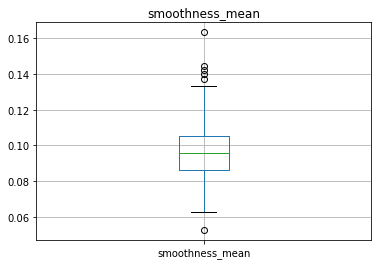

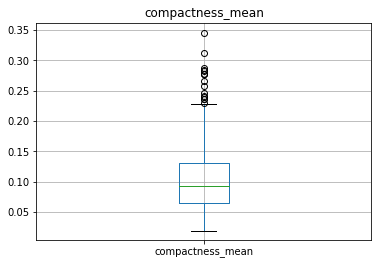

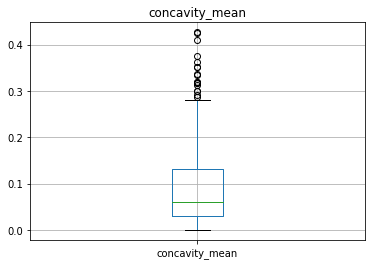

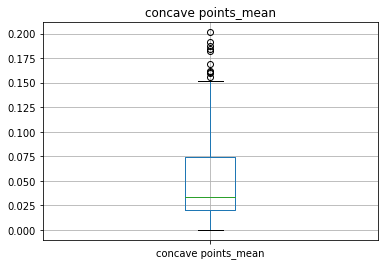

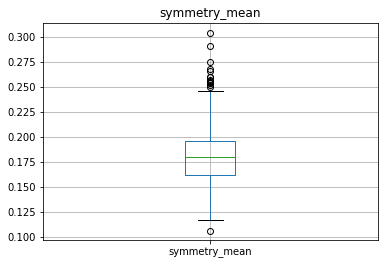

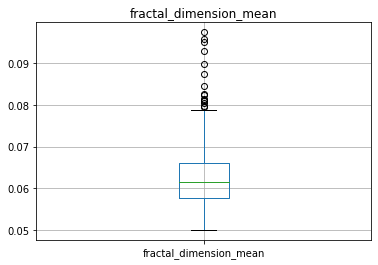

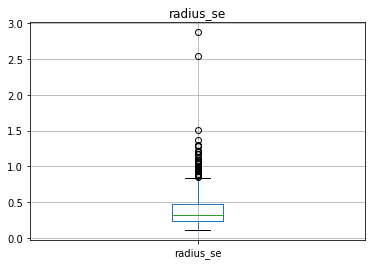

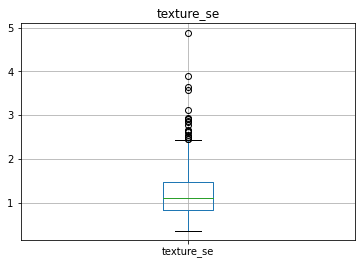

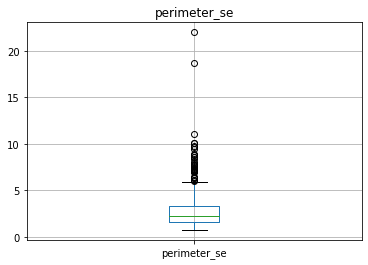

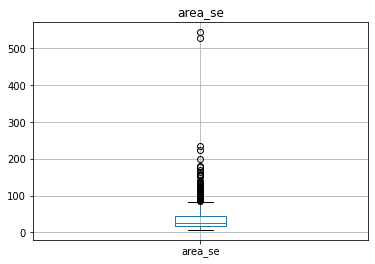

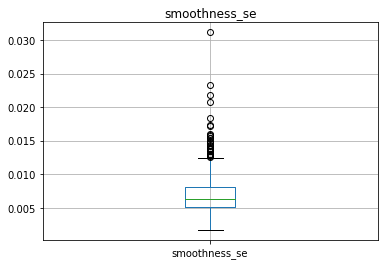

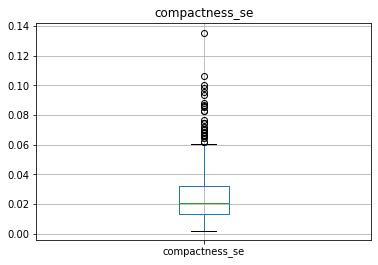

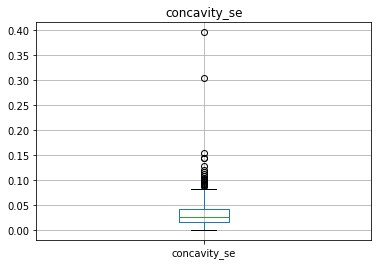

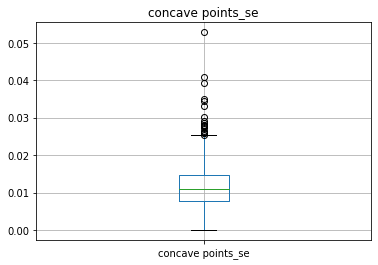

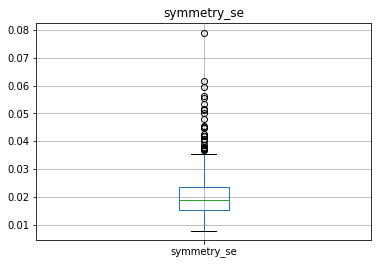

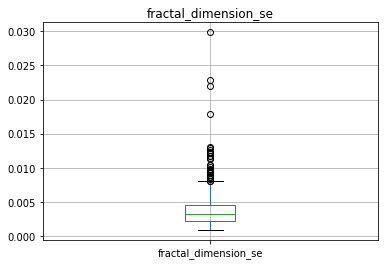

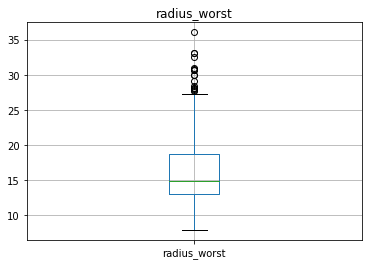

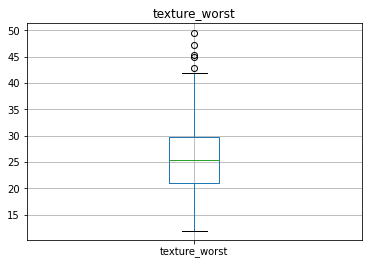

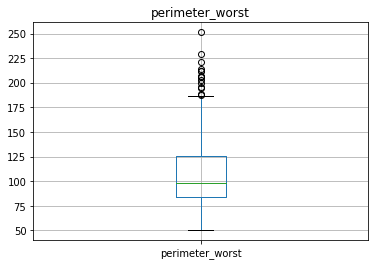

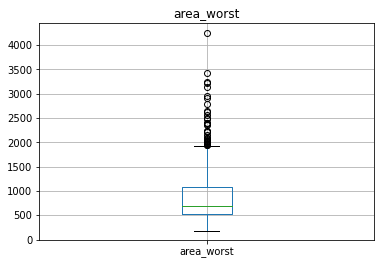

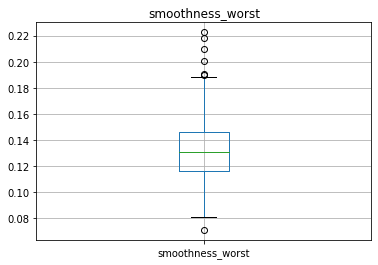

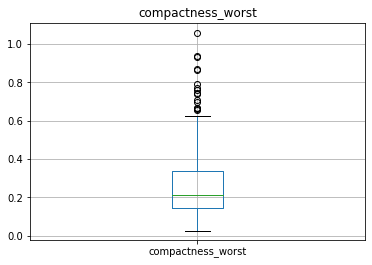

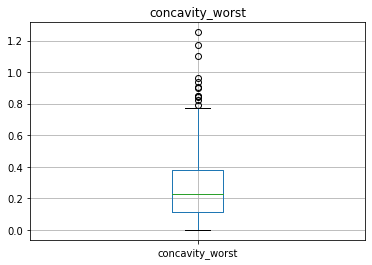

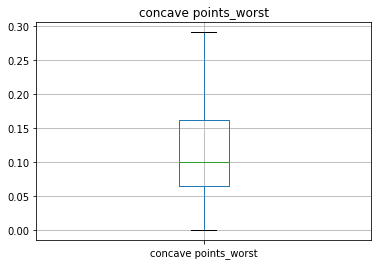

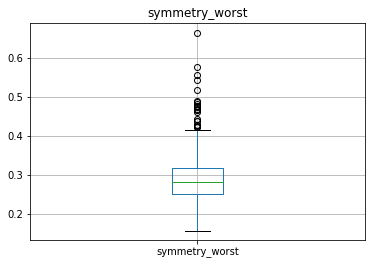

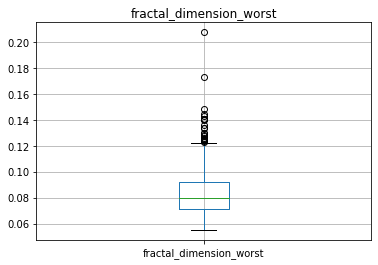

In [20]:
def find_outliers(df,var):
  df = df.copy()
  df.boxplot(column = var)
  plt.title(var)
  plt.show()


for i in continuous_numCols:
  find_outliers(data,i)

# Step 6:Categorical data analysis

In [22]:
# ->1.visualize the categorical data
print('categorical columns:',catCols,len(catCols))
print('-'*60)
print(data[catCols].head())
print('-'*60)

# ->2.cardinality of the categorical data
print(data[catCols].nunique())
print('-'*60)

# ->3 analyse rare labels
def analyse_rare_vars(df,var,rare_percentage):
  df = df.copy()
  tmp = df.groupby(var)['diagnosis'].count()/len(df)
  return tmp[tmp < rare_percentage]

for i in catCols:
  print(analyse_rare_vars(data,i,0.01)) #here we,consider rare percent as 1%
  print()

categorical columns: Index(['diagnosis'], dtype='object') 1
------------------------------------------------------------
   diagnosis
0          1
1          1
2          1
3          1
4          1
------------------------------------------------------------
diagnosis    2
dtype: int64
------------------------------------------------------------
Series([], Name: diagnosis, dtype: float64)



# 3.Feature Engineering
Here,we will deal with all the problems like

1.   train_test split
2.   missing value treatment
3.   outlier treatment
4.   rare category treatment
5.   caterical data encoding
6.   feature scaling
7.   feature selection






In [24]:
# ->1. Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,data['diagnosis'],random_state =0,test_size = 0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 32) (114, 32) (455,) (114,)


In [25]:
# ->2. missing value treatmnet --> no missing values , so skippin gthis step

In [26]:
# ->step 3. handling outliers -->skipping


# for var in continuous_numCols:
#   find_outliers(data,var)

In [27]:
# ->4.handling rare labels

print('categorical columns:',catCols,len(catCols))

categorical columns: Index(['diagnosis'], dtype='object') 1


In [28]:
cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

def find_frequent_labels(df,var,rare_percent):
  df = df.copy()
  tmp = df.groupby(var)['loan_status'].count()/len(df)
  return tmp[tmp>rare_percent].index

print('categorical variables:',cat_vars,len(cat_vars))

for var in cat_vars:

  # find the frequent categories
  frequent_ls = find_frequent_labels(X_train,var,0.01)

  # replace rarecategorical columns with 'Rare' labels
  X_train[var] = np.where(X_train[var].isin(frequent_ls),X_train[var],'Rare')

  X_test[var] = np.where(X_test[var].isin(frequent_ls),X_test[var],'Rare')

categorical variables: [] 0


In [29]:
# ->5.Encoding categorical variables

def replace_categories(train,test,var,target):

  ordered_labels = train.groupby([var])[target].mean().sort_values().index

  ordinal_label ={k:i for i,k in enumerate(ordered_labels,0)}

  train[var] = train[var].map(ordinal_label)
  test[var] = test[var].map(ordinal_label)

for var in cat_vars:
  replace_categories(X_train, X_test, var, 'diagnosis')

print(X_train.shape,X_test.shape)
print(X_train.head())

(455, 32) (114, 32)
           id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
338    897880          0  ...          0.2894                  0.07664
427     90745          0  ...          0.2965                  0.07662
406    905189          0  ...          0.2778                  0.07012
96      86211          0  ...          0.2227                  0.07376
490  91376701          0  ...          0.3100                  0.08203

[5 rows x 32 columns]


In [30]:
# ->6 Feature scaling
train_vars = [var for var in X_train.columns if var not in ['diagnosis']]
print(train_vars,len(train_vars))

# import the scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train[train_vars])

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'] 31


In [31]:
# ->7. feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
print(X_train.head())

y_train = X_train['diagnosis']
y_test = X_test['diagnosis']

# drop unnecessary variables from our training and testing sets
X_train.drop(['diagnosis'], axis=1, inplace=True)
X_test.drop(['diagnosis'], axis=1, inplace=True)

# remember to set the seed, the random state in this function
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# train Lasso model and select features
sel_.fit(X_train, y_train)

            id  diagnosis  ...  symmetry_worst  fractal_dimension_worst
338  -0.000959          0  ...        0.113506                -0.146630
427  -0.102564          0  ...        0.215517                -0.147618
406  -0.000039          0  ...       -0.053161                -0.468526
96   -0.103135          0  ...       -0.844828                -0.288818
490  11.388797          0  ...        0.409483                 0.119477

[5 rows x 32 columns]


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [32]:
sel_.get_support()

array([ True,  True,  True, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True])

In [33]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 31
selected features: 18
features with coefficients shrank to zero: 13


In [34]:
# print the selected features
selected_feats

Index(['id', 'radius_mean', 'texture_mean', 'concave points_mean',
       'fractal_dimension_mean', 'radius_se', 'area_se', 'compactness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'smoothness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Checking which model will perform better

In [35]:
# we will evaluate different machine learning classification models 
from sklearn.model_selection import cross_val_score


# 1- Logistic Regression
# 2- K-nearest neighbors classification
# 3- support vector machine
# 4- naive bayes
# 5- random forest classification
# -----------------------------------
# Function to calculate mean absolute error

def cross_val(X_train,X_test,model):
  accuracies = cross_val_score(estimator = model,X=X_train,y=y_train,cv=5)
  return accuracies.mean()


def fit_and_evaluate(model):

  # train the model
  model.fit(X_train,y_train)

  model_pred = model.predict(X_test)
  model_cross = cross_val(X_train,y_train,model)
  return model_cross

# Evaluating various models
# ----------------------------------------

from sklearn import model_selection
from numpy import abs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
models = []
names = []
score = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))
models.append(("xg booster",XGBClassifier()))

for name,model in models:
  # print('Name:',name)
  logr_cross = fit_and_evaluate(model)
  print("Name:",name,',Cross Validation Score = %0.4f' % logr_cross)
  score.append(logr_cross)



Name: Logistic Regression ,Cross Validation Score = 0.9824
Name: Linear svc ,Cross Validation Score = 0.9626
Name: Random forest classifier ,Cross Validation Score = 0.9538
Name: knn  ,Cross Validation Score = 0.9604
Name: Guassian NB  ,Cross Validation Score = 0.9451
Name: Decision TreeClassifier ,Cross Validation Score = 0.9231
Name: xg booster ,Cross Validation Score = 0.9626


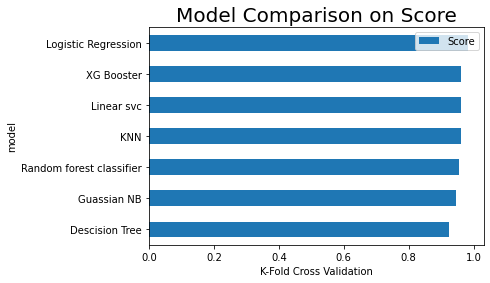

In [36]:
model_comparison = pd.DataFrame({'model':['Logistic Regression','Linear svc','Random forest classifier','KNN','Guassian NB','Descision Tree','XG Booster'],'Score':score})

# horizontal bar  chart
model_comparison.sort_values('Score',ascending=True).plot(x = 'model', y = 'Score', kind = 'barh')
plt.xlabel('K-Fold Cross Validation')
plt.title('Model Comparison on Score', size = 20);
plt.show()


In [37]:
# Model selected:Logistic Regression


# Model Optimization by hyper-parameter tuning
-we will ty to find optimal hyper-parameters for gradient boosting regrssor

In [49]:
from scipy.stats import uniform
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])

In [50]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)

In [51]:
# Fit on the traing model

clf.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=200,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=0,
                                                solver='saga', tol=0.01,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff3f47c1210>,
                                        'penalty': ['l2', 'l1']},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_tra

In [52]:
print(clf.best_params_)

{'C': 2.195254015709299, 'penalty': 'l1'}


In [53]:
print(clf.score(X_test , y_test))

0.9210526315789473


In [57]:
log = LogisticRegression(C = 2.195254015709299, penalty='l1', solver='liblinear')
log.fit(X_train,y_train)
Y_pred = log.predict(X_test)
log.score(X_train, y_train)
acc_log_reg = round(log.score(X_train, y_train) * 100, 2)
acc_log_reg

98.68

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,Y_pred)
print(cm)
print(accuracy_score(y_test,Y_pred))

[[64  3]
 [ 3 44]]
0.9473684210526315


In [59]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

